In [80]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import MissingIndicator,SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer,make_column_selector
from sklearn.feature_selection import RFECV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [81]:
drive.mount("/content/drive")#HER TO GET DATA FROM MY DRIVE

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
data=pd.read_csv("/content/drive/MyDrive/data/bank-full.csv") #transfer data cv to pandas

In [83]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [84]:
X=data.drop(["y"],axis=1)
y=data["y"].replace(["yes","no"],[1,0])

In [85]:
X['housing']=X['housing'].replace(["yes","no"],[1,0])
X['loan']=X['loan'].replace(["yes","no"],[1,0])
X['default']=X['default'].replace(["yes","no"],[1,0])

In [86]:
from sklearn import metrics
X_=X[["age",'balance','duration','pdays','default','housing','loan',"day"]]

In [87]:
#this is for ony varibale quantite
select=RFECV(SGDClassifier(random_state=0),
             cv=5,
             min_features_to_select=2,
             step=1
             
             )
select.fit_transform(X_,y)
select.ranking_

array([3, 6, 5, 7, 1, 2, 1, 4])

her we see the rank we  chose only variable have lot of rank in my case i chose all varibales

```
# This is formatted as code
```



In [88]:
X_=X[['age','balance','duration','pdays','default','housing','loan','day']]#data without minmu rank because the minimum is not itressed me i taked the last is 1
#chose best parametre for calssfier
param={"n_neighbors":np.arange(1,50)}
grid=GridSearchCV(KNeighborsClassifier(),param,cv=50,scoring="neg_mean_squared_error")
grid.fit(X_,y)
print(grid.best_params_)


{'n_neighbors': 47}


split my data

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
y_test=np.array(y_test).reshape(9043,1)

In [90]:
#test if i have  none value
test_na=MissingIndicator()
test_na.fit_transform(y_test),test_na.fit_transform(X_test)

(array([], shape=(9043, 0), dtype=bool),
 array([], shape=(9043, 0), dtype=bool))

In [ ]:
#split varibles to varibale quality and quantite

In [91]:
num_columns=["age","balance","duration","pdays","day"]#quantitative variable
category_columns=["job","marital","education","contact","month","poutcome"]#quality varibale
category_pipeline=make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder())# transfer quality variabe to quantitative varible using onehot
num_piplines=make_pipeline(SimpleImputer(strategy="most_frequent"),StandardScaler())#normalisation of data qualitative


In [92]:

process=make_column_transformer((num_piplines,num_columns),(category_pipeline,category_columns))#we make pipline

In [93]:
#we make the final pipline betwin the process and Kneighbors model 
model=make_pipeline(process,KNeighborsClassifier(n_neighbors=47))
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.9001050652510506

In [94]:
#we predict values
y_pred=model.predict(X_test)

In [95]:
#put predcit and test data in dataframe
df=pd.DataFrame(y_pred,columns=["prediction"])
df["test"]=y_test
df["deff"]=df["prediction"]-df["test"]

No handles with labels found to put in legend.


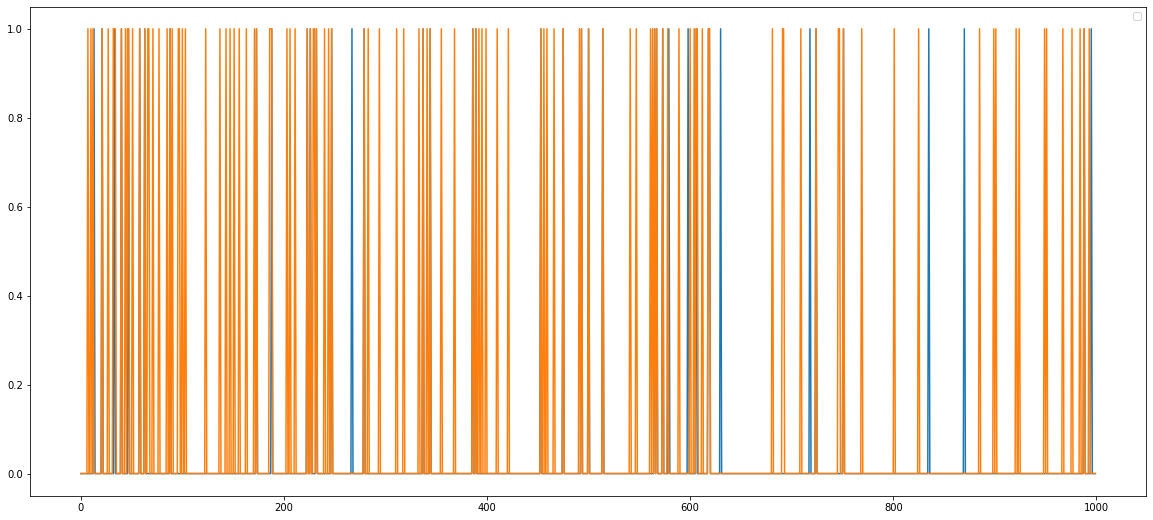

In [96]:
#we plot data to see defrence 
plt.figure(figsize=(20,9))
plt.plot(df["prediction"][:1000])
plt.plot(df["test"][:1000])
plt.legend()

In [97]:
from sklearn.metrics import mean_squared_error
# calculate root mean squared error
testScore = np.sqrt(mean_squared_error(df["prediction"],df["test"]))
print('Test Score: %.8f RMSE' % (testScore))

Test Score: 0.32 RMSE


In [98]:
if testScore < df["test"].std():
    print('\n[ Model performance is GOOD enough ]')
    print('\nRMSE of test prediction < Standard deviation of test dataset')
    print('%.8f' % (testScore), '<', '%.8f' % (df["test"].std()))
else:
    print('\n[ Model performance is NOT GOOD enough ]')
    print('\nRMSE of test prediction > Standard deviation of test dataset')
    print('%.8f' % (testScore), '>', '%.8f' % (df["test"].std()))



[ Model performance is GOOD enough ]

RMSE of test prediction < Standard deviation of test dataset
0.31913435 < 0.32


In [104]:
#the last etape is to transfer output to yes or no
#data should be in this order of variable
def calssifcation(model,data):
    result=[]
    x=data.drop(["y"],axis=1)
    predction=model.predict(x)
    for i in predction:
        if i==0:
            result.append("no")
        else:
            result.append("yes")
    data["result"]=result
    return data

In [105]:
#exemple for data 100 donee
dt=pd.read_csv("/content/drive/MyDrive/data/bank_.csv") #transfer data cv to pandas)
calssifcation(model,dt.iloc[:50])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])